<font size="5">Imports</font>


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

<font size="5">Reading Dataset</font>

In [143]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


<font size="5">Data Preparation</font>

In [144]:
df = df.replace('?', np.NaN)
df = df.dropna()
df = df[(df["hours-per-week"]>0)]
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


<font size="5">Error Correcting</font>

<AxesSubplot:xlabel='hours-per-week'>

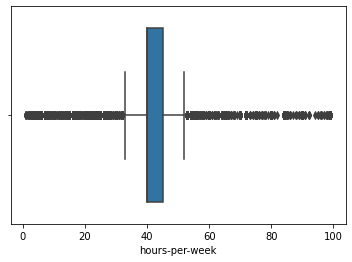

In [145]:
sns.boxplot(df["hours-per-week"])

In [146]:
Q1 = df["hours-per-week"].quantile(0.25)
Q3 = df["hours-per-week"].quantile(0.75)

In [147]:
iqr = Q3 - Q1
iqr

5.0

In [148]:
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

In [149]:
df = df[(df['hours-per-week']<upper_limit) & (df['hours-per-week']>lower_limit)]

<AxesSubplot:xlabel='hours-per-week'>

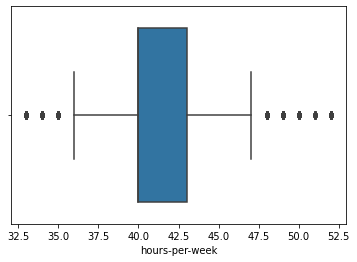

In [150]:
sns.boxplot(df["hours-per-week"])

<font size="5">Data Transformation</font>

In [151]:
incomes = df["income"].unique()
incomes

array(['<=50K', '>50K'], dtype=object)

In [152]:
df['income'].replace( incomes, [0,1] , inplace=True)

In [153]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0


<font size="5">Model Building</font>

In [160]:
X_train, X_test, y_train, y_test = train_test_split(df["hours-per-week"], df["income"], train_size=0.3)

In [161]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [162]:
reg = LogisticRegression().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
pred_reg = reg.predict(y_test)
nb_pred = nb.predict(y_test)
print("Accuracy for Logistic Regression : ", accuracy_score( pred_reg, y_test))
print("Accuracy for Naive Bayes : ", accuracy_score( nb_pred, y_test))

Accuracy for Logistic Regression :  0.7376430745488061
Accuracy for Naive Bayes :  0.2623569254511939
